<a href="https://colab.research.google.com/github/newmantic/Stochastic_Liability_Modeling/blob/main/stochastic_liability_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

def stochastic_liability_model(initial_liability, time_horizon, discount_rate, volatility, n_simulations):
    """
    Simulate future liabilities under stochastic conditions.

    Parameters:
    - initial_liability: The starting liability amount.
    - time_horizon: The number of years to project.
    - discount_rate: The annual discount rate (as a percentage).
    - volatility: The annual volatility of liabilities (as a percentage).
    - n_simulations: The number of simulations to run.

    Returns:
    - liabilities: A numpy array containing the projected liabilities for each simulation.
    - present_values: A numpy array containing the present values of the liabilities for each simulation.
    """
    dt = 1  # yearly time steps
    liabilities = np.zeros((n_simulations, time_horizon))
    present_values = np.zeros(n_simulations)

    for i in range(n_simulations):
        liabilities[i, 0] = initial_liability
        for t in range(1, time_horizon):
            growth_factor = np.exp((discount_rate - 0.5 * volatility**2) * dt + volatility * np.sqrt(dt) * np.random.normal())
            liabilities[i, t] = liabilities[i, t-1] * growth_factor

        # Discount future liabilities to present value
        discount_factors = np.exp(-discount_rate * np.arange(1, time_horizon+1))
        present_values[i] = np.sum(liabilities[i, :] * discount_factors)

    return liabilities, present_values





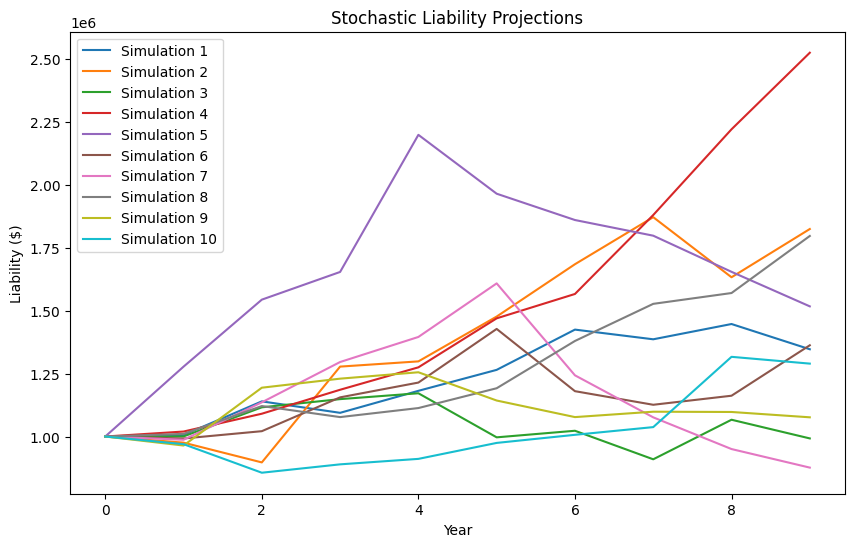

Mean Present Value: $9,726,841.41
Standard Deviation of Present Values: $1,714,210.52


In [2]:
import matplotlib.pyplot as plt

# Parameters
initial_liability = 1000000  # Initial liability of $1,000,000
time_horizon = 10  # Projecting over 10 years
discount_rate = 0.03  # 3% annual discount rate
volatility = 0.1  # 10% annual volatility
n_simulations = 1000  # Run 1000 simulations

# Run the stochastic liability model
liabilities, present_values = stochastic_liability_model(initial_liability, time_horizon, discount_rate, volatility, n_simulations)

# Plot a few simulations of the liability over time
plt.figure(figsize=(10, 6))
for i in range(min(n_simulations, 10)):  # Plot the first 10 simulations
    plt.plot(range(time_horizon), liabilities[i, :], label=f'Simulation {i+1}')
plt.title('Stochastic Liability Projections')
plt.xlabel('Year')
plt.ylabel('Liability ($)')
plt.legend()
plt.show()

# Summary statistics of present values
print(f"Mean Present Value: ${np.mean(present_values):,.2f}")
print(f"Standard Deviation of Present Values: ${np.std(present_values):,.2f}")